# _`automaton`_`.eliminate_state(`_`state`_ = -1`)`

In the Brzozowski-McCluskey procedure, remove one state.

Postcondition:
- The labelset is oneset (i.e., the automaton is spontaneous).
- The weightset is expressionset (i.e., the weights are expressions).
- The `_state_` is indeed a state of the automaton, or it is -1, in which case a heuristics is used to select the next state.

See also:
- [_automaton_.expression](automaton.expression.ipynb)
- [_automaton_.lift](automaton.lift.ipynb)

## Examples

In [1]:
import vcsn

:0: FutureWarning: IPython widgets are experimental and may change in the future.


<IPython.core.display.Javascript object>

The following examples with be using this simple automaton as input.

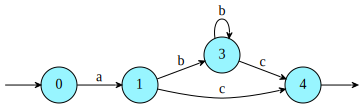

In [2]:
a0 = vcsn.B.expression('ab*c').standard()
a0

We first need to convert this automaton into a spontaneous automaton labeled with expressions.  That's the purpose of [_automaton_.lift](automaton.lift.ipynb).

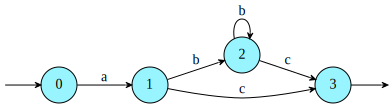

In [3]:
a1 = a0.lift()
a1

### Explicit state elimination
Let's remove state 2:

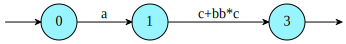

In [4]:
a2 = a1.eliminate_state(2)
a2

Note that the result is a fresh automaton: the original automaton is not modified:


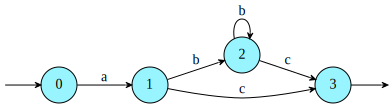

In [5]:
a1

Let's eliminate state 1.

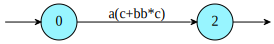

In [6]:
a3 = a2.eliminate_state(1)
a3

We can also remove the initial and final states.

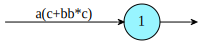

In [7]:
a4 = a3.eliminate_state(0)
a4

Eventually, when all the states have been removed, you get a _broken_ automaton, with no states, but a "lone transition" that bears the answer.

In [8]:
a5 = a4.eliminate_state(1)
a5

Rest assured that such automata (no states but with one transition) never occur in the normal course of use of Vcsn.

### Using the heuristics
Use -1 (or no argument at all) to leave the choice of the next state to eliminate to Vcsn.  This is how [automaton.expression](automaton.expression.ipynb) works.

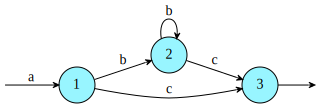

In [9]:
a1.eliminate_state()

In [10]:
a1.eliminate_state().eliminate_state().eliminate_state().eliminate_state()

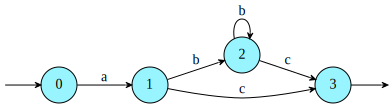

In [11]:
from IPython.html import widgets
from IPython.display import display
from IPython.utils import traitlets
from vcsn.ipython import interact_h

def slider_eliminate_state(aut):
    ''' Creates the list of automaton while applying the eliminate_state algorithm'''
    count = aut.state_number()
    auts = {}
    auts[0] = aut
    for i in range(count):
        aut = aut.eliminate_state()
        auts[i + 1] = aut
    return auts, count

def update_svg(name, value, new):
    interact_h(lambda: display(auts[new]))

class SliderWidget(widgets.IntSlider):
    def __init__(self, auths, count):
        self.auths = auths
        self.value = 0
        self._widget = widgets.IntSlider(description='Algorithm step(s)', min=0, max=count, step=1, value=0)
        self._widget.on_trait_change(update_svg,'value')

    def show(self):
        display(self._widget)
        interact_h(lambda: display(auts[0]))

# Call on the automaton to show.
auts, count = slider_eliminate_state(a1)

slider = SliderWidget(auts, count)
slider.show()